In [527]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler


Load the dataset and preprocessing

In [528]:
df = pd.read_csv('humanactivity.csv')

In [529]:
df

,ActID,TotalAccXMean,TotalAccYMean,TotalAccZMean,BodyAccXRMS,BodyAccYRMS,BodyAccZRMS,BodyAccXCovZeroValue,BodyAccXCovFirstPos,BodyAccXCovFirstValue,...,BodyAccZSpectVal6,BodyAccXPowerBand1,BodyAccXPowerBand2,BodyAccXPowerBand3,BodyAccYPowerBand1,BodyAccYPowerBand2,BodyAccYPowerBand3,BodyAccZPowerBand1,BodyAccZPowerBand2,BodyAccZPowerBand3
0,1,0.764034,0.585142,-0.256940,0.109121,0.083456,0.036783,0.381036,-1.0,0.067645,...,0.000126,2.559475,2.304699,0.000411,1.497160,1.348245,0.000273,0.291051,0.261600,0.000049
1,1,0.764064,0.585018,-0.256942,0.109209,0.083319,0.036554,0.381653,-1.0,0.066487,...,0.000158,2.561893,2.310154,0.000459,1.485622,1.350188,0.000243,0.284165,0.261658,0.000052
2,1,0.764010,0.585013,-0.257079,0.108962,0.083465,0.036516,0.379924,-1.0,0.066038,...,0.000129,2.535267,2.314777,0.000418,1.499559,1.346296,0.000268,0.287182,0.257530,0.000045
3,1,0.764093,0.584778,-0.257286,0.109039,0.083582,0.036911,0.380466,-1.0,0.066519,...,0.000179,2.553120,2.303789,0.000408,1.497448,1.356222,0.000264,0.291062,0.265375,0.000052
4,1,0.764137,0.584614,-0.257317,0.109041,0.083301,0.036660,0.380481,-1.0,0.066725,...,0.000149,2.550126,2.307175,0.000464,1.493084,1.341705,0.000243,0.287135,0.261906,0.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24070,5,-0.106003,1.103882,-0.178987,0.506661,1.685909,0.289297,8.214560,-2.1,0.872409,...,0.029504,27.189125,77.413285,0.000151,75.894895,1084.396171,0.009578,2.648645,31.334140,0.002370
24071,5,-0.110181,1.131311,-0.151840,0.510259,1.728457,0.295822,8.331648,-2.2,0.762994,...,0.036097,26.924954,79.589211,0.000009,92.911769,1129.848975,0.006628,1.506955,34.298659,0.002466
24072,5,-0.161784,1.067148,-0.119733,0.479459,1.702382,0.316390,7.356199,-2.3,0.164146,...,0.067835,20.503350,73.417682,0.002776,82.386727,1104.629669,0.003002,4.360964,36.577566,0.001357
24073,5,-0.096240,1.193767,-0.170017,0.475637,1.802160,0.356890,7.239372,-2.5,0.216752,...,0.050345,24.191138,68.399073,0.000659,120.919146,1201.820861,0.072289,7.083617,44.289405,0.025181


In [530]:
df.describe()

,ActID,TotalAccXMean,TotalAccYMean,TotalAccZMean,BodyAccXRMS,BodyAccYRMS,BodyAccZRMS,BodyAccXCovZeroValue,BodyAccXCovFirstPos,BodyAccXCovFirstValue,...,BodyAccZSpectVal6,BodyAccXPowerBand1,BodyAccXPowerBand2,BodyAccXPowerBand3,BodyAccYPowerBand1,BodyAccYPowerBand2,BodyAccYPowerBand3,BodyAccZPowerBand1,BodyAccZPowerBand2,BodyAccZPowerBand3
count,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,24075.000000,...,24075.000000,24075.000000,24075.000000,2.407500e+04,24075.000000,24075.000000,2.407500e+04,24075.000000,24075.000000,2.407500e+04
mean,2.640374,0.056229,0.502560,-0.234221,0.193935,0.454387,0.225730,2.452598,-1.870147,0.275687,...,0.054669,4.016825,27.270168,1.532889e-02,15.246424,166.060988,2.880110e-02,6.225484,34.673391,1.513254e-02
std,1.306205,0.230120,0.744037,0.332261,0.197572,0.487146,0.221954,3.952824,0.740147,0.581050,...,0.128345,7.886574,45.400285,6.098391e-02,27.276542,276.975722,1.094213e-01,11.582839,62.387003,5.054392e-02
min,1.000000,-0.453039,-1.244913,-0.989318,0.001369,0.002445,0.000647,0.000000,-2.700000,-0.729147,...,0.000000,0.000115,0.000456,1.114640e-12,0.000890,0.001277,1.393132e-13,0.000010,0.000114,3.480691e-14
25%,2.000000,-0.096622,0.064795,-0.272453,0.028706,0.138740,0.028787,0.026368,-2.400000,0.002904,...,0.000114,0.171658,0.163245,2.396513e-05,2.978039,3.726014,3.074152e-04,0.151364,0.169131,1.942700e-05
50%,2.000000,-0.014897,0.941564,-0.094008,0.116871,0.145899,0.138094,0.437082,-2.200000,0.043250,...,0.002794,0.943460,2.677315,1.503526e-04,4.434498,4.299131,7.566105e-04,3.629303,3.718096,6.308658e-04
75%,4.000000,0.177098,1.005345,-0.022640,0.302994,0.880149,0.335487,2.937767,-1.000000,0.286172,...,0.043960,3.765572,33.388953,5.466612e-03,15.815175,280.631129,9.886522e-03,5.653736,40.104543,5.868701e-03
max,5.000000,0.834224,1.669893,0.360210,0.992140,2.232413,1.424217,31.498909,0.000000,11.363057,...,2.328970,87.833831,392.405462,9.851877e-01,426.576443,1969.197704,3.203657e+00,240.138126,774.893250,1.164676e+00


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24075 entries, 0 to 24074
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ActID                  24075 non-null  int64  
 1   TotalAccXMean          24075 non-null  float64
 2   TotalAccYMean          24075 non-null  float64
 3   TotalAccZMean          24075 non-null  float64
 4   BodyAccXRMS            24075 non-null  float64
 5   BodyAccYRMS            24075 non-null  float64
 6   BodyAccZRMS            24075 non-null  float64
 7   BodyAccXCovZeroValue   24075 non-null  float64
 8   BodyAccXCovFirstPos    24075 non-null  float64
 9   BodyAccXCovFirstValue  24075 non-null  float64
 10  BodyAccYCovZeroValue   24075 non-null  float64
 11  BodyAccYCovFirstPos    24075 non-null  float64
 12  BodyAccYCovFirstValue  24075 non-null  float64
 13  BodyAccZCovZeroValue   24075 non-null  float64
 14  BodyAccZCovFirstPos    24075 non-null  float64
 15  Bo

In [532]:
df.isnull().sum().sum()

np.int64(0)

All features numerical and no missing values. ActID is the target variable and it has the information of the classes.

The ranges of the features

In [533]:
n_features = df.shape[1]
ranges = df.max() - df.min()
min_range_feat = ranges.idxmin()
max_range_feat = ranges.idxmax()
min_range_val = float(ranges[min_range_feat])
max_range_val = float(ranges[max_range_feat])

Min and max ranges

In [534]:
min_range_val, max_range_val

(0.9790038020579003, 1969.1964276609262)

Data normalization

In [535]:
# Define colunns to scale (all except "ActID")
cols_to_scale = [col for col in df.columns if col != "ActID"]

# Create a MinMaxScaler and apply it to the selected columns
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print(df.head())


   ActID  TotalAccXMean  TotalAccYMean  TotalAccZMean  BodyAccXRMS  \
0      1       0.945474       0.627848       0.542692     0.108756   
1      1       0.945496       0.627805       0.542691     0.108845   
2      1       0.945455       0.627804       0.542589     0.108595   
3      1       0.945520       0.627723       0.542435     0.108674   
4      1       0.945553       0.627667       0.542412     0.108676   

   BodyAccYRMS  BodyAccZRMS  BodyAccXCovZeroValue  BodyAccXCovFirstPos  \
0     0.036329     0.025384              0.012097              0.62963   
1     0.036267     0.025223              0.012116              0.62963   
2     0.036333     0.025197              0.012062              0.62963   
3     0.036385     0.025474              0.012079              0.62963   
4     0.036259     0.025298              0.012079              0.62963   

   BodyAccXCovFirstValue  ...  BodyAccZSpectVal6  BodyAccXPowerBand1  \
0               0.065893  ...           0.000054            0.

In [536]:
df["ActID"].unique()

array([1, 2, 3, 4, 5])

The target variable has 5 classes. The labels have to be transformed into a scale 0-4.

In [537]:
le = LabelEncoder()
df["ActID"] = le.fit_transform(df["ActID"]) 

In [538]:
df["ActID"].value_counts()

ActID
1    6220
0    5850
2    5396
3    3956
4    2653
Name: count, dtype: int64

The data is unbalanced because classes have different number of samples.

Train and test split (random and stratified)

In [ ]:
train_data, test_data = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["ActID"] 
)


In [541]:
X_train = train_data.drop(columns=["ActID"]).select_dtypes(include=[np.number]).values
y_train = train_data["ActID"].astype(int).values

X_test = test_data.drop(columns=["ActID"]).select_dtypes(include=[np.number]).values
y_test = test_data["ActID"].astype(int).values

In [ ]:

in_dim  = X_train.shape[1]             
out_dim = len(np.unique(y_train))  

The train/test features converted to float32 tensors and the labels to long tensors

In [543]:
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test,  dtype=torch.float32)
y_test_t  = torch.tensor(y_test,  dtype=torch.long)

The training and test sets loaded using PyTorch’s DataLoader with a batch size of 16

In [544]:
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=16, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t),  batch_size=16, shuffle=False)


Neural network definition and initialization

In [545]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim=in_dim, hidden = 64, out_dim=out_dim):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, out_dim)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [546]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=60, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=5, bias=True)
  )
)


Loss function defined using CrossEntropy and model optimization using SGD

In [547]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

Model training function

In [548]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    batch_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            batch_loss += loss

    print(f"Avg loss (train): {batch_loss / len(dataloader):>7f} \n")

Model testing function

In [549]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss (test): {test_loss:>8f} \n")

Training and testing process

In [550]:
epochs = 32
epoch_loss = 0
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Avg loss (train): 0.012530 

Test Error: 
 Accuracy: 86.7%, Avg loss (test): 0.699792 

Epoch 2
-------------------------------
Avg loss (train): 0.005381 

Test Error: 
 Accuracy: 88.0%, Avg loss (test): 0.361126 

Epoch 3
-------------------------------
Avg loss (train): 0.003229 

Test Error: 
 Accuracy: 94.0%, Avg loss (test): 0.264472 

Epoch 4
-------------------------------
Avg loss (train): 0.002638 

Test Error: 
 Accuracy: 94.4%, Avg loss (test): 0.214003 

Epoch 5
-------------------------------
Avg loss (train): 0.002207 

Test Error: 
 Accuracy: 95.3%, Avg loss (test): 0.182794 

Epoch 6
-------------------------------
Avg loss (train): 0.001851 

Test Error: 
 Accuracy: 95.7%, Avg loss (test): 0.162098 

Epoch 7
-------------------------------
Avg loss (train): 0.001594 

Test Error: 
 Accuracy: 95.8%, Avg loss (test): 0.148645 

Epoch 8
-------------------------------
Avg loss (train): 0.001543 

Test Error: 
 Accuracy: 96.1%, Avg 

I tried different values for hyperparameters and with these values, the training loss is quite small but the code is pretty fast:
-Number of epochs = 60
-Batch size = 16 
-Learning rate = 0.01
-Number of hidden layers = 64

Next, confusion matrix, classification report and accuracy

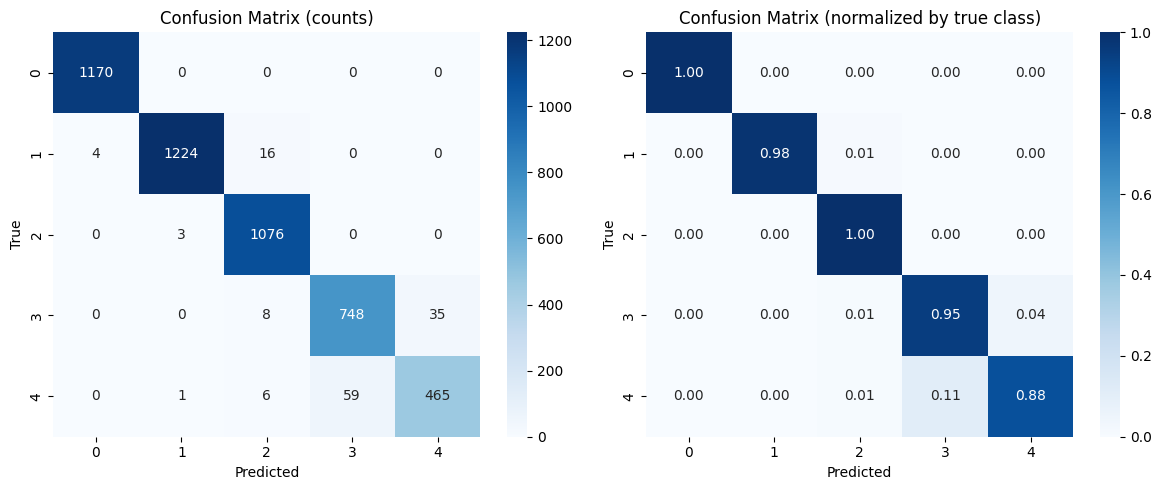

Classification report:

              precision    recall  f1-score   support

           0     0.9966    1.0000    0.9983      1170
           1     0.9967    0.9839    0.9903      1244
           2     0.9729    0.9972    0.9849      1079
           3     0.9269    0.9456    0.9362       791
           4     0.9300    0.8757    0.9020       531

    accuracy                         0.9726      4815
   macro avg     0.9646    0.9605    0.9623      4815
weighted avg     0.9725    0.9726    0.9724      4815



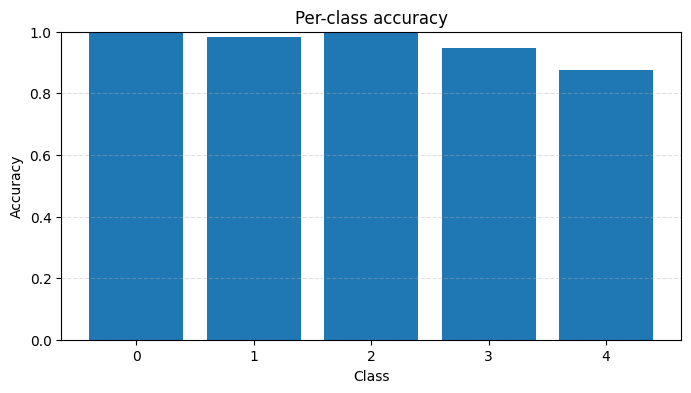

In [551]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on test set
model.eval()
preds_list, targets_list = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        out = model(Xb)
        preds_list.append(out.argmax(dim=1).cpu().numpy())
        targets_list.append(yb.cpu().numpy())

y_pred = np.concatenate(preds_list)
y_true = np.concatenate(targets_list)

# Confusion matrices (raw and normalized)
cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (counts)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (normalized by true class)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Print classification report
print("Classification report:\n")
print(classification_report(y_true, y_pred, digits=4))

# Per-class accuracy bar plot
per_class_acc = np.diag(cm) / cm.sum(axis=1)
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(per_class_acc)), per_class_acc, color='tab:blue')
plt.xticks(np.arange(len(per_class_acc)))
plt.ylim(0, 1)
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Per-class accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

In summary, the neural network -model works well and has high accuracy (<97%). The original class 1 is classified as the best and class 5 as the worst (classes 0 and 4 in the figure). However, all classes achieve an accuracy of between 88% and 100%, which is a good result.